In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [44]:
df = pd.read_csv("test1026.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [45]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [46]:
df['weekday'] = df.pickup_datetime.dt.day_name()
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [47]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,4,4,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,1,6,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,4,4,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,1,1,15


In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday', 'month', 'weekday_num', 'pickup_hour'],
      dtype='object')

In [7]:
# 결측치 확인

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
weekday               0
month                 0
weekday_num           0
pickup_hour           0
dtype: int64

In [8]:
#승객 수 조사
df['passenger_count'].value_counts()


1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [9]:
# 픽업시간 조사
df['pickup_hour'].value_counts()

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: pickup_hour, dtype: int64

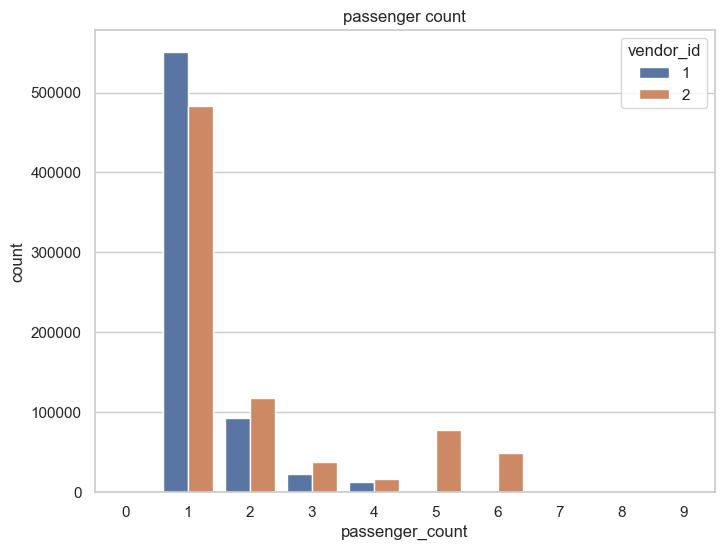

In [10]:
# Vender에 따른 승객수
sns.set(style="whitegrid") 

plt.figure(figsize=(8, 6))

ax1 = sns.countplot(x='passenger_count', data=df, hue='vendor_id')

plt.title('passenger count')
plt.xlabel('passenger_count')
plt.ylabel('count')
plt.legend(title='vendor_id')

plt.show()

In [11]:
# 'pickup_hour', 'passenger_count', 'vendor_id', 'month'로만 구성된 새로운 newdf 구성
newdf = df.loc[:, ['pickup_hour', 'passenger_count', 'vendor_id', 'month']]

newdf

,pickup_hour,passenger_count,vendor_id,month
0,17,1,2,3
1,0,1,1,6
2,11,1,2,1
3,19,1,2,4
4,13,1,2,3
...,...,...,...,...
1458639,13,4,2,4
1458640,7,1,1,1
1458641,6,1,2,4
1458642,15,1,1,1


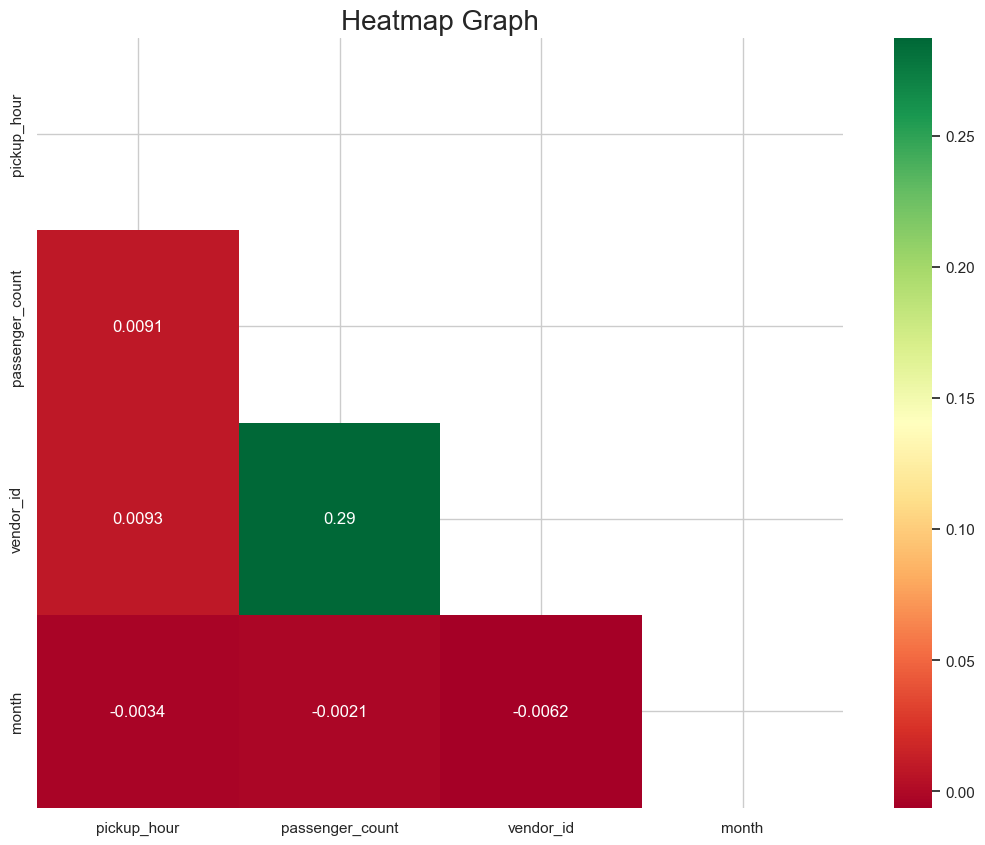

In [18]:
#newdf의 히트맵 작성

plt.figure(figsize=(13,10))
corr_data = newdf.corr()
upp_mat = np.triu(corr_data)

ax = sns.heatmap(corr_data, annot=True, cmap='RdYlGn', mask=upp_mat)
plt.title('Heatmap Graph', fontsize=20)
plt.show() 

In [32]:
# 승객이 0인 픽업 위도경도 로 구성된 zeropickup 생성
zeropickup = df.loc[df['passenger_count'] == 0].loc[:, ['pickup_longitude', 'pickup_latitude']]
zeropickup.head()

,pickup_longitude,pickup_latitude
62744,-73.776367,40.645248
136519,-73.993134,40.757473
194288,-73.946243,40.772903
217765,-73.815224,40.700081
263809,-73.861633,40.705029


In [36]:
# 승객이 0인 드롭 위도경도 로 구성된 zeropickup 생성
zerodropoff = df.loc[df['passenger_count'] == 0].loc[:, ['dropoff_longitude', 'dropoff_latitude']]
zerodropoff.head()

,dropoff_longitude,dropoff_latitude
62744,-73.776360,40.645260
136519,-73.993294,40.757538
194288,-73.946770,40.774841
217765,-73.950699,40.755222
263809,-73.861633,40.705029


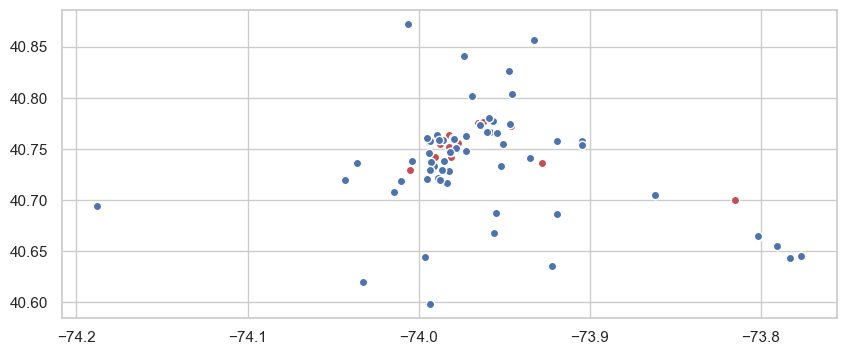

In [37]:
# 픽업가 드롭에 따른 위도경도 산점도 작성

plt.figure(figsize=(10,4))
plt.scatter(zeropickup['pickup_longitude'], zeropickup['pickup_latitude'], 
            color='r', edgecolor='w', label='zeropickup')
plt.scatter(zerodropoff['dropoff_longitude'], zerodropoff['dropoff_latitude'], 
            color='b', edgecolor='w', label='zerodropoff')

In [39]:
# 승객수가 4명인 픽업의 위도와 경도, 승객수
fourpickup = df.loc[df['passenger_count'] == 4].loc[:, ['pickup_longitude', 'pickup_latitude', 'passenger_count']]
fourpickup.head()

,pickup_longitude,pickup_latitude,passenger_count
6,-73.969017,40.757839,4
11,-73.991531,40.749439,4
61,-73.976952,40.752022,4
107,-73.975807,40.760628,4
154,-74.006706,40.705555,4


In [48]:
# 4시에 드롭한 위도와 경도, 승객수, 픽업시간
fourdropoff = df.loc[df['pickup_hour'] == 4].loc[:, ['dropoff_longitude', 'dropoff_latitude', 'pickup_hour']]
fourdropoff.head()

,dropoff_longitude,dropoff_latitude,pickup_hour
169,-73.910530,40.709492,4
255,-73.945961,40.711437,4
301,-73.982605,40.757504,4
313,-73.960709,40.797470,4
423,-73.937622,40.698074,4


In [64]:
#'passenger_count', 'trip_duration', 'month', 'weekday', 'pickup_hour'로 구성된 data6 생성
data6 = df.loc[:, ['passenger_count', 'trip_duration', 'month', 'weekday_num', 'pickup_hour']]
data6.head()

,passenger_count,trip_duration,month,weekday_num,pickup_hour
0,1,455,3,0,17
1,1,663,6,6,0
2,1,2124,1,1,11
3,1,429,4,2,19
4,1,435,3,5,13


In [54]:
data6.month.value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: month, dtype: int64

In [65]:
# 1월과 5월에 승객수와 요일
hist1 = data6.loc[data6['month']==1].loc[:, ['passenger_count', 'weekday_num']]
hist2 = data6.loc[data6['month']==5].loc[:, ['passenger_count', 'weekday_num']]

hist1

,passenger_count,weekday_num
2,1,1
5,6,5
34,1,5
36,3,1
46,1,6
...,...,...
1458623,1,0
1458625,1,0
1458626,2,6
1458640,1,6


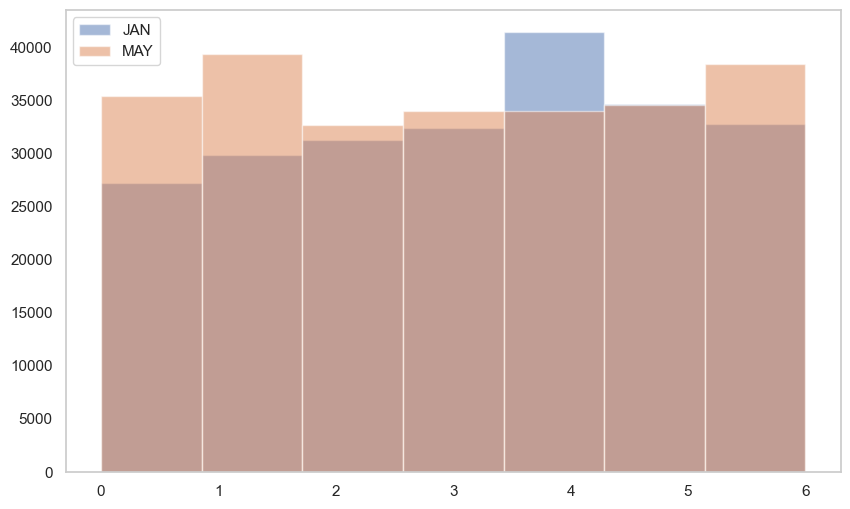

In [74]:
#hist1, hist2를 활용 히스토그램 작성
plt.figure(figsize=(10, 6))
plt.hist(hist1['weekday_num'], bins=7, alpha=0.5, label='JAN')
plt.hist(hist2['weekday_num'], bins=7, alpha=0.5, label='MAY')

plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='weekday_num', ylabel='Count'>

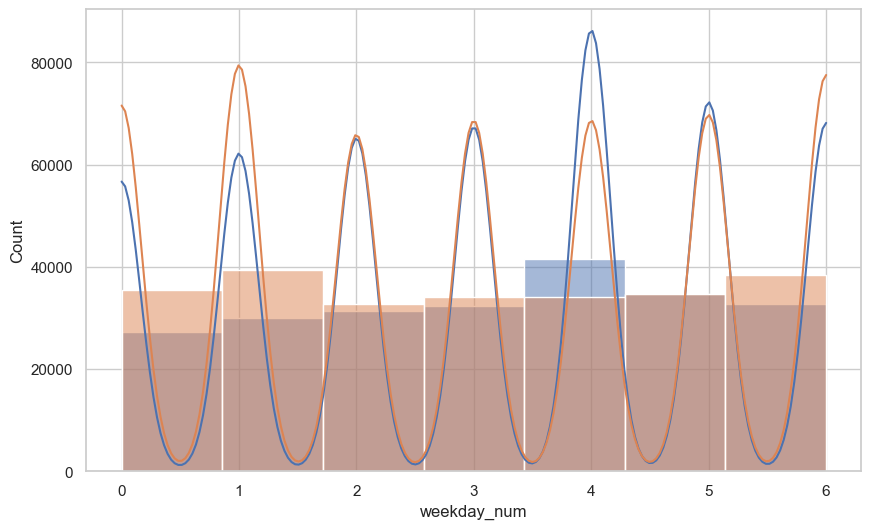

In [79]:
# 동일한 데이터로  KDE 히스토그램 작성
plt.figure(figsize=(10, 6))
sns.histplot(hist1['weekday_num'], bins=7, alpha=0.5, label='JAN', kde=True)
sns.histplot(hist2['weekday_num'], bins=7, alpha=0.5, label='MAY', kde=True)

In [80]:
data6.head()

,passenger_count,trip_duration,month,weekday_num,pickup_hour
0,1,455,3,0,17
1,1,663,6,6,0
2,1,2124,1,1,11
3,1,429,4,2,19
4,1,435,3,5,13


In [ ]:
# 1월인 passenger_count','weekday'인 JAN 생성

In [85]:
jan = hist1
jan

,passenger_count,weekday_num
2,1,1
5,6,5
34,1,5
36,3,1
46,1,6
...,...,...
1458623,1,0
1458625,1,0
1458626,2,6
1458640,1,6


<Axes: xlabel='weekday_num', ylabel='passenger_count'>

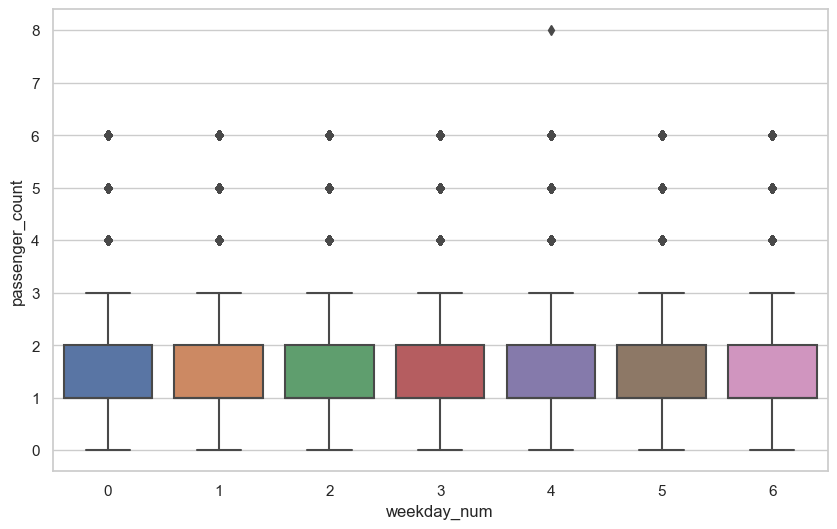

In [87]:
# 1월만 선별

# 요일별 승객수 표시

plt.figure(figsize=(10,6))

sns.boxplot(x=hist1['weekday_num'], y=hist1['passenger_count'])